# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [182]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [183]:
df_iris = pd.read_csv('/home/user/Documents/coding_temple/week4/day3/Iris.csv', header=None)

In [184]:
#df_iris['sepal_length(cm)'] = df_iris[0]
df_iris[0]
newdf = pd.DataFrame()

In [185]:
newdf['sepal_length'] = df_iris[1]
newdf['sepal_width'] = df_iris[2]
newdf['petal_length'] = df_iris[3]
newdf['petal_width'] = df_iris[4]
newdf.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [186]:
df = newdf

In [187]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [188]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

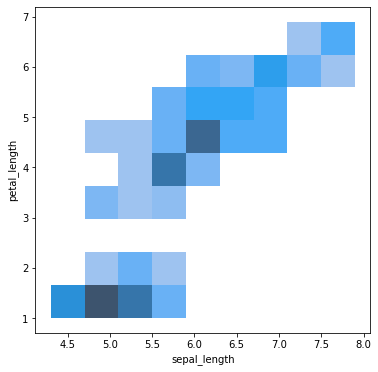

In [189]:
plot=plt.figure(figsize=(6,6))
sns.histplot(x='sepal_length',y='petal_length',data=df)

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

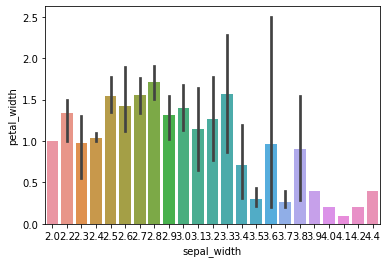

In [190]:
sns.barplot(x='sepal_width',y='petal_width',data=df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

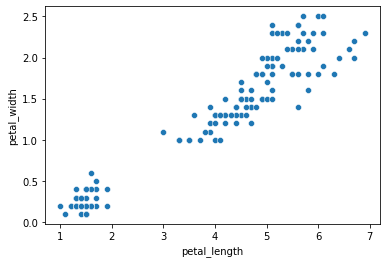

In [191]:
sns.scatterplot(x='petal_length',y='petal_width',data=df)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

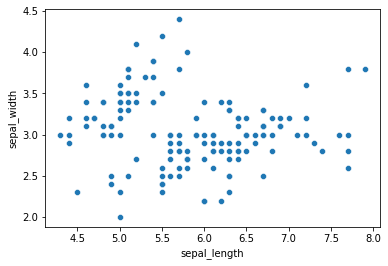

In [192]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df)

In [193]:
target = 'sepal_width'
X = df.drop(columns=target)
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=.8, random_state=42)

display(x_test)
print(y_test)
assert len(x_train) + len(x_test) == len(X)

,sepal_length,petal_length,petal_width
73,6.1,4.7,1.2
18,5.7,1.7,0.3
118,7.7,6.9,2.3
78,6.0,4.5,1.5
76,6.8,4.8,1.4
31,5.4,1.5,0.4
64,5.6,3.6,1.3
141,6.9,5.1,2.3
68,6.2,4.5,1.5
82,5.8,3.9,1.2


73     2.8
18     3.8
118    2.6
78     2.9
76     2.8
31     3.4
64     2.9
141    3.1
68     2.2
82     2.7
110    3.2
12     3.0
36     3.5
9      3.1
19     3.8
56     3.3
104    3.0
69     2.5
55     2.8
132    2.8
29     3.2
127    3.0
26     3.4
128    2.8
131    3.8
145    3.0
108    2.5
143    3.2
45     3.0
30     3.1
Name: sepal_width, dtype: float64


In [194]:
# Establish a baseline:
baseline = [df.sepal_length.mean()] * len(df)
baseline

[5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,
 5.843333333333334,


In [195]:
ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(x_train, y_train)
x_trans = ohe.transform(x_train)
model_dt = LinearRegression()
model_dt.fit(x_trans, y_train)

LinearRegression()

In [196]:
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)
pipe_dt.fit(x_train, y_train)
model_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestRegressor(random_state=42)
)
model_rf.fit(x_train, y_train)
model_xg = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    XGBRegressor(random_state=42)
)
model_xg.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [197]:
mean_absolute_error(y_train, pipe_dt.predict(x_train))

0.005833333333333339

In [198]:
mean_absolute_error(y_test, pipe_dt.predict(x_test))

0.3733333333333333

In [199]:
mean_absolute_error(y_train, model_rf.predict(x_train))


0.07458333333333324

In [200]:
mean_absolute_error(y_test, model_rf.predict(x_test))


0.2903166666666663

In [201]:
mean_absolute_error(y_train, model_xg.predict(x_train))


0.008484969933827727

In [202]:
mean_absolute_error(y_test, model_xg.predict(x_test))

0.3525643110275268

In [203]:
print(Y.shape,Y_train.shape,Y_test.shape)

(150,) (120,) (30,)


In [204]:
modellr = RandomForestClassifier(random_state=42)